<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Regress%C3%A3o_vendasdecarros_Previs%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Previsão das vendas de carros com Regressão Linear**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


aqui vamos inserir a nossa base de dados

In [2]:
base = pd.read_csv('/content/car data.csv')

In [3]:
base.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
base.shape

(301, 9)

algumas estatísticas interessantes

In [6]:
base.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


vamos ver se há valores faltantes

In [8]:
base.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
np.unique(base['Transmission'], return_counts=True)

(array(['Automatic', 'Manual'], dtype=object), array([ 40, 261]))

ou seja, a maioria dos carros são manuais - 261

Vamos inserir alguns gráficos para uma melhor visão da situação

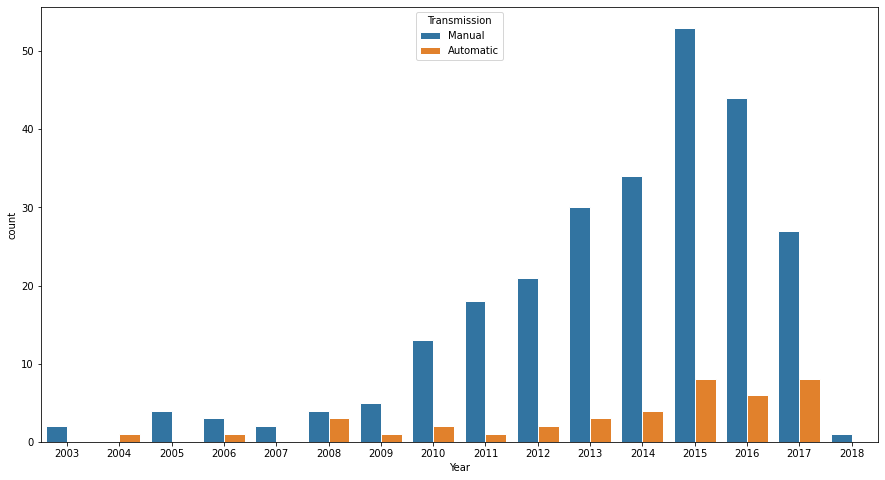

In [11]:
plt.figure(figsize=(15,8))
sns.countplot( x = 'Year', hue='Transmission', edgecolor='1',data=base)
plt.show();

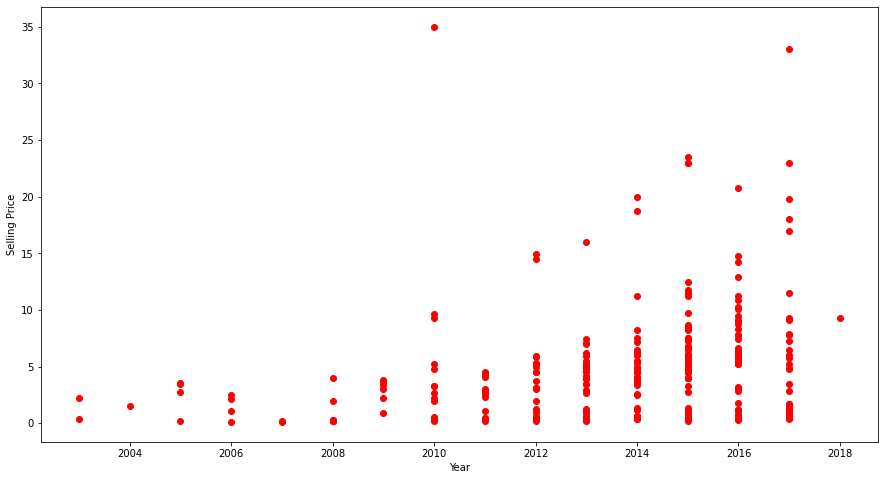

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(base['Year'], base['Selling_Price'], color='red')
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

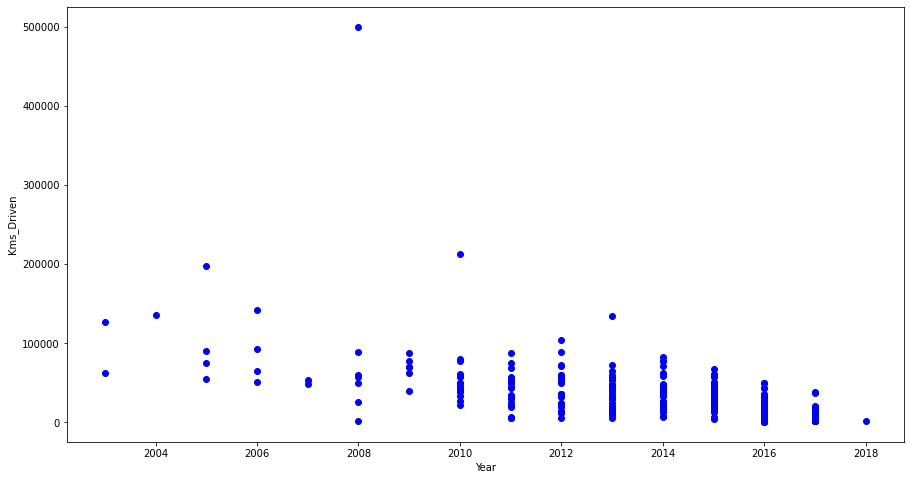

In [42]:
plt.figure(figsize=(15,8))
plt.scatter(base['Year'], base['Kms_Driven'], color='blue')
plt.xlabel("Year")
plt.ylabel("Kms_Driven")
plt.show()

aqui temos que substituir por valores

In [15]:
base['Transmission'].replace({'Manual': 0, 'Automatic': 1}, inplace=True)
base['Seller_Type'].replace({'Dealer': 0, 'Individual': 1}, inplace=True)
base['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2}, inplace=True)

In [16]:
base.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
base.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


separando as variáveis target das previsoras

In [18]:
x = base.iloc[:,[1,3,4,5,6,7,8]].values
y = base.iloc[:,2].values

In [19]:
x

array([[2.0140e+03, 5.5900e+00, 2.7000e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 9.5400e+00, 4.3000e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 9.8500e+00, 6.9000e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0090e+03, 1.1000e+01, 8.7934e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 1.2500e+01, 9.0000e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0160e+03, 5.9000e+00, 5.4640e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [20]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

Vamos treinar o Modelo

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

In [23]:
x_treino.shape

(225, 7)

In [24]:
y_treino.shape

(225,)

In [25]:
x_teste.shape

(76, 7)

In [26]:
y_teste.shape

(76,)

Vamos usar o algorítimo de Regressão Linear

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
modelo = LinearRegression()

In [29]:
modelo.fit(x_treino, y_treino)

LinearRegression()

In [30]:
previsão = modelo.predict(x_teste)
previsão

array([ 7.08116375, -0.34778693,  4.39251189,  8.50523618, 13.59916378,
        4.96959079,  3.6817552 ,  1.42213013,  5.28281471,  4.76767283,
        2.45405739,  1.59177671,  5.15899397,  7.42622454,  8.12314599,
       13.71297994,  7.19613038,  4.3895981 , -0.36980919,  2.32342099,
        4.96164592,  3.92199269,  6.35380065,  8.07735211, -1.7565571 ,
        1.89633988, -0.69665759,  0.84096003,  0.05928392,  7.05995048,
        3.20015998,  6.98246085,  0.74593109,  7.43831094,  3.74052139,
        1.78220493,  5.64275408,  6.53617338, -2.53755306,  8.62434016,
        8.66353145, 19.12602755,  4.48980405,  3.9915907 ,  6.22763143,
        9.33204033,  0.17817227,  1.65724807,  5.26152047,  6.88559389,
        7.93197487,  4.29247302,  5.02356072, 19.46935113,  1.73738094,
        1.31403762,  0.33219424,  2.21678119,  3.57229229,  0.87053628,
        3.77228163,  6.40821944,  2.74947891, 20.52433162,  4.43996868,
        5.6658022 ,  8.63021203,  7.37673834,  2.99056068,  2.81

In [31]:
y_teste

array([ 8.25,  0.5 ,  5.25,  9.5 , 18.  ,  5.5 ,  3.75,  0.45,  4.5 ,
        4.5 ,  2.7 ,  0.72,  5.25,  7.5 ,  7.75, 19.75,  7.4 ,  4.75,
        0.35,  1.7 ,  4.4 ,  5.25,  5.11, 11.25,  0.2 ,  0.78,  0.38,
        0.65,  0.5 ,  3.6 ,  3.25,  7.2 ,  0.6 ,  8.75,  3.  ,  1.15,
        6.6 ,  4.75,  0.25,  8.25,  9.25, 19.99,  5.5 ,  4.75,  5.5 ,
       12.9 ,  0.3 ,  1.05,  5.25,  6.5 ,  7.5 ,  2.9 ,  4.8 , 23.5 ,
        1.2 ,  1.1 ,  0.65,  2.55,  4.15,  1.35,  3.51,  4.9 ,  2.  ,
       33.  ,  3.75,  5.65,  8.55,  3.8 ,  0.4 ,  2.65,  2.85,  2.65,
        0.48,  6.15,  0.31,  6.  ])

In [32]:
modelo.score(x_treino, y_treino)

0.8797157389756153

In [33]:
modelo.score(x_teste, y_teste)

0.8619745435369581

temos uma boa acurácia do modelo, ou seja, o algoritimo fez previsões muito boas

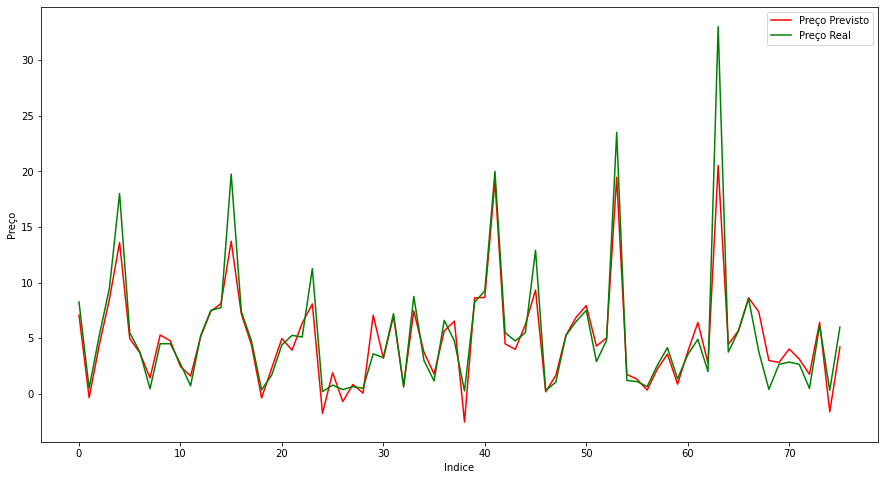

In [43]:
plt.figure(figsize=(15,8))
plt.plot(range(previsão.shape[0]), previsão,'red')
plt.plot(range(y_teste.shape[0]), y_teste,'green')
plt.legend(['Preço Previsto', 'Preço Real'])
plt.ylabel('Preço')
plt.xlabel('Indice')
plt.show();

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_teste, previsão)

0.8619745435369581